<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9E%D0%B1%D0%BD%D0%B0%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%8B_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Обнаружение формы OpenCV</b></h1>

В этом уроке мы используем свойства контура фигур, чтобы маркировать и идентифицировать формы на изображении.

### Download the code zip file

Загрузка файлов

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_25.shape_detection.zip
!unzip -qq Lesson_25.shape_detection.zip
%cd /content/Lesson_25.shape_detection

--2022-02-02 18:50:08--  http://dataudt.ru/datasets/cv/Lesson_25.shape_detection.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10808 (11K) [application/zip]
Saving to: ‘Lesson_25.shape_detection.zip’

Lesson_25.shape_det 100%[===================>]  10.55K  --.-KB/s    in 0s      

2022-02-02 18:50:09 (99.8 MB/s) - ‘Lesson_25.shape_detection.zip’ saved [10808/10808]

/content/Lesson_25.shape_detection


## Blog Post Code

Основной блок кода

### Import Packages

Импорт библиотек

In [2]:
# import the necessary packages
# импортируем необходимые библиотеки
from matplotlib import pyplot as plt
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

Функция отображения изображений в Jupyter Notebooks и Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
    # конвертируем изображение из формата BGR в RGB и отображаем его
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(10,10))
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Defining our shape detector

In [4]:
class ShapeDetector:
	def __init__(self):
		pass

	def detect(self, c):
		# initialize the shape name and approximate the contour
        # инициализируем название формы и аппроксимируем контур
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

		# if the shape is a triangle, it will have 3 vertices
        # если фигура - треугольник, то у нее будет 3 вершины
		if len(approx) == 3:
			shape = "triangle"

		# if the shape has 4 vertices, it is either a square or
		# a rectangle
        # если фигура имеет 4 вершины, это либо квадрат, либо
		# прямоугольник
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
            # вычисляем ограничивающую рамку контура и используем
			# ее для вычисления соотношения сторон
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)

			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
            # квадрат будет иметь соотношение сторон примерно
			# равным единице, иначе форма будет прямоугольной
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# if the shape is a pentagon, it will have 5 vertices
        # если фигура пятиугольник, то у него будет 5 вершин
		elif len(approx) == 5:
			shape = "pentagon"
        # if the shape is a hexagon, it will have 6 vertices
		# если фигура шестиугольник, то у него будет 6 вершин
		elif len(approx) == 6:
			shape = "hexagon"


		# otherwise, we assume the shape is a circle
		# в противном случае мы предполагаем, что фигура представляет собой круг
		else:
			shape = "circle"

		# return the name of the shape
        # возвращаем название фигуры
		return shape

### Shape detection with OpenCV

Детектор формы OpenCV

In [5]:
# construct the argument parser and parse the arguments
# создаем парсер аргументов  и начинаем их собирать
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
args = {
	"image": "fig.png"
}

In [6]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
# загружаем изображение и уменьшаем его размер, чтобы
# формы могли быть лучше аппроксимированы
image = cv2.imread(args["image"])
resized = imutils.resize(image, width=600)
ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly,
# and threshold it
# преобразоваем изображение с измененным размером в оттенки серого, слегка его размываем,
# и ограничиваем его
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image and initialize the
# shape detector
# находим контуры в ограниченных изображении и инициализируем
# детектор формы
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

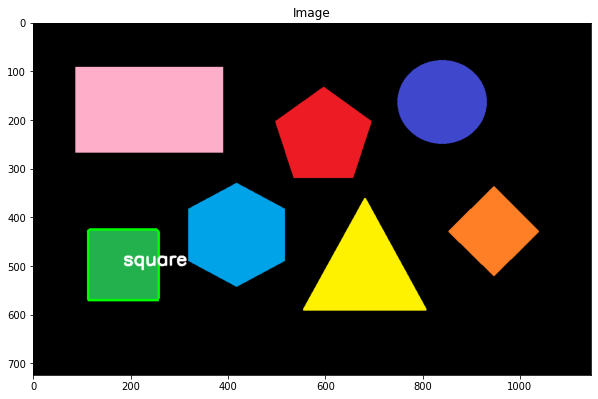

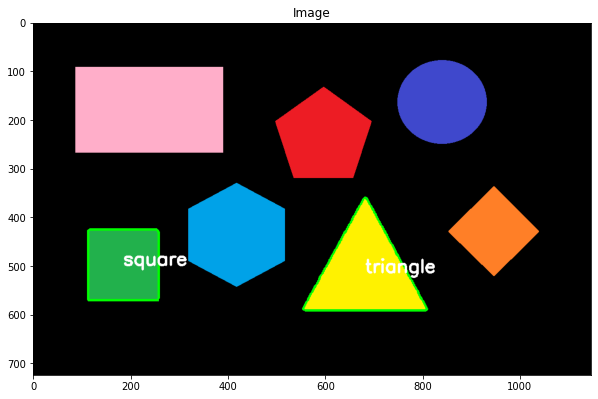

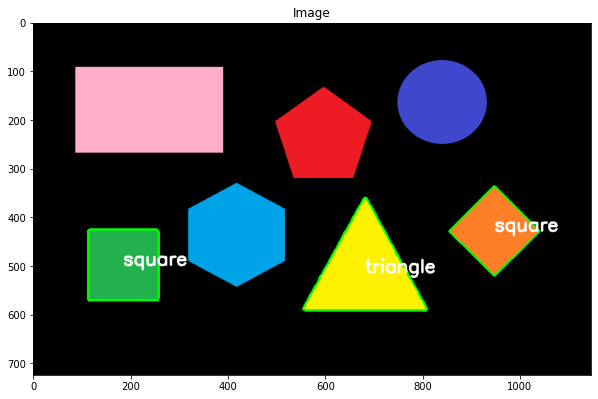

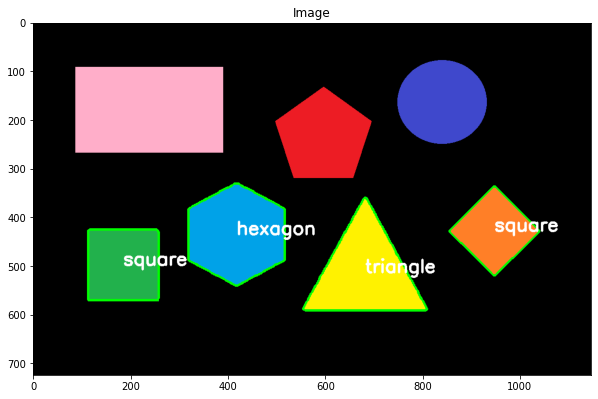

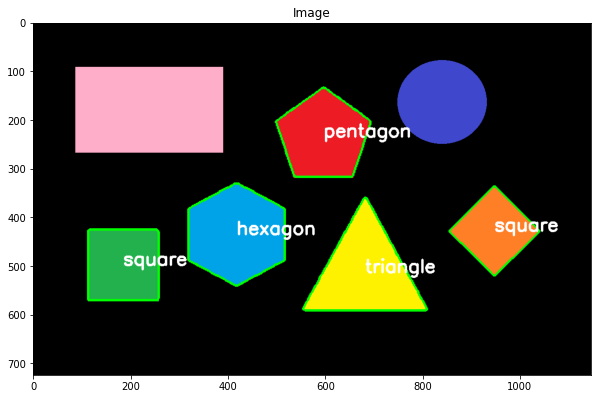

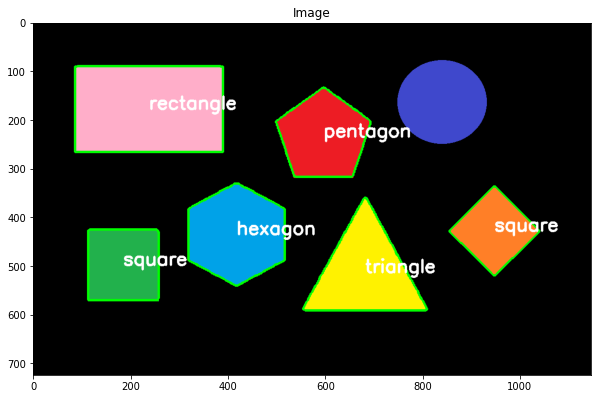

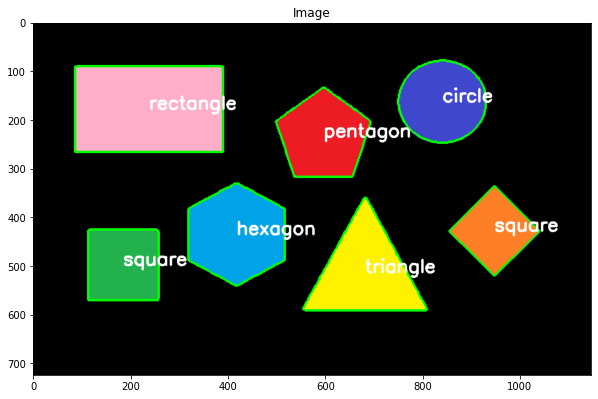

In [7]:
# loop over the contours
# перебираем контуры
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
    # вычисляем центр контура, затем определяем название его
	# формы с использованием только его очертаний
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)

	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
    # умножаем координаты контура (x, y) на коэффициент изменения размера,
	# затем нарисуйте контуры и название фигуры на изображении
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 4)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		1.25, (255, 255, 255),4)

	# show the output image
    # показываем выходное изображение
	plt_imshow("Image", image)